In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

from utilidades.validar import validar
from utilidades.graficar import ver_dispersion

In [33]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

dfinicial = pd.read_csv("data/train_limpio.csv")
dftest = pd.read_csv("data/test_limpio.csv")

#dfinicial2 = pd.read_csv("data/esteban/train_limpio_ciudades.csv")
#dftest2 = pd.read_csv("data/esteban/test_limpio_ciudades.csv")

xg = pd.read_csv('submits/submit_xg_prueba.csv')

In [35]:
dfinicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 71 columns):
tipodepropiedad_Apartamento                      240000 non-null int64
tipodepropiedad_Casa en condominio               240000 non-null int64
tipodepropiedad_Casa                             240000 non-null int64
tipodepropiedad_Terreno                          240000 non-null int64
tipodepropiedad_Terreno comercial                240000 non-null int64
tipodepropiedad_Local Comercial                  240000 non-null int64
tipodepropiedad_Quinta Vacacional                240000 non-null int64
tipodepropiedad_Oficina comercial                240000 non-null int64
tipodepropiedad_Edificio                         240000 non-null int64
tipodepropiedad_Casa uso de suelo                240000 non-null int64
tipodepropiedad_Local en centro comercial        240000 non-null int64
tipodepropiedad_Bodega comercial                 240000 non-null int64
tipodepropiedad_Otros                

In [36]:
xg.head()

,id,target
0,4941,4831603.00
1,51775,812344.94
2,115253,2203735.00
3,299321,1403080.20
4,173570,596104.40


In [37]:
pd.set_option('display.max_columns', 23) #ver todas las columnas
pd.set_option('display.max_rows', 100) #como mucho ver 100 filas

In [55]:
def generar_subida(DFTRAIN, metodo, DFTEST, nomArchivo, pasarAdisco):
    """
    X: datos de entrenamiento
    y: target de X
    metodo: algoritmo a utilizar
    """
    
    
    X, y = DFTRAIN.drop( columns = ['precio'] ), DFTRAIN["precio"]

    reg = metodo(max_depth=10)

    reg.fit(X,y)
    
    subida = pd.DataFrame( reg.predict(DFTEST) , columns=["target"])
    subida.insert(0, "id", test["id"]) #test todavía tiene los ids
    
    subida['id'] = subida['id'].astype(np.uint32)
    subida['target'] = subida['target'].astype(np.uint32)
    
    # Heurística: si vale menos de 310 000, ponerle 310 000
    subida.loc[ subida['target'] <= 310000, 'target'] = 310000
    
    # Heurística 2: si vale más de 12 500 000, ponerle 12 500 000
    subida.loc[ subida['target'] >= 12500000, 'target'] = 12500000
    
    #Este modelo no necesita las euristicas,pero igual no da muy bien
    
    
    if pasarAdisco:
        subida.to_csv(f"submits/" + nomArchivo, index = False) 
    
    return X, y, subida

In [57]:
dfinicial1 = dfinicial[dfinicial['metrostotales']<225].drop( columns = ['dia'] )
dftest1 = dftest.drop( columns = ['dia'] )

#dfinicial1 = dfinicial2.drop( columns = [ 'anio', 'metrostotales', 'dia', 'mes', 'banos', 'centroscomercialescercanos',  'escuelascercanas'
#                           ])                                        
 
#dftest1 = dftest2.drop( columns = [  'anio', 'metrostotales', 'dia', 'mes', 'banos', 'centroscomercialescercanos', 'escuelascercanas'
#                           ])   

X, y, subida = generar_subida( dfinicial1, DecisionTreeRegressor, dftest1, "prueba_DecisionTree.csv", True)

# IMPRIME EL PROMEDIO DE DIFERENCIA CON EL MEJOR RESULTADO (EL DE XG DE JULIÁN)
# UN VALOR MENOR ES MEJOR
dftot = subida.merge(xg, on = 'id', how = 'inner')
dftot['diferencia'] = abs( dftot['target_x'] - dftot['target_y'] )
round (dftot['diferencia'].sum() / len( dftot['diferencia'] ) )

454431.0

In [51]:
#Sólo si el valor anterior es menor a 500 000, usar esto:
validar(X, y, DecisionTreeRegressor, False)

Error de fold N°0 es : 762656.4369492956
Error de fold N°1 es : 766363.5847746056
Error de fold N°2 es : 762952.190312094
Error de fold N°3 es : 771044.6645040939
Error de fold N°4 es : 765822.1633207831


In [52]:
#Sólo si el valor anterior es menor a 500 000, usar esto:
validar(X, y, DecisionTreeRegressor, max_depth=10)

Error de fold N°0 es : 645207.8450017632
Error de fold N°1 es : 652289.7171507423
Error de fold N°2 es : 651068.9680550842
Error de fold N°3 es : 648311.296299063
Error de fold N°4 es : 652408.5749218464


NameError: name 'y_test' is not defined

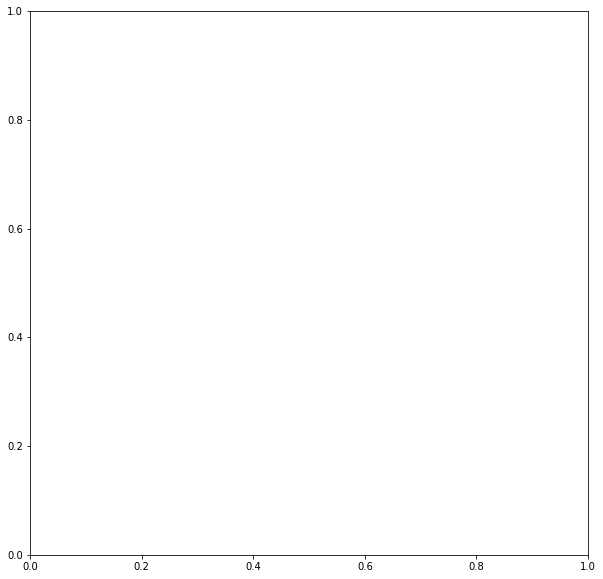

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel("Valores reales", fontsize=16)
ax.set_ylabel("Valores predichos", fontsize=16);

In [ ]:
#reg = LinearRegression(normalize=True, n_jobs = -1)
#reg.fit(X,y)

In [ ]:
train.info()

In [ ]:
train['descripcion'] = train['descripcion'].to_string()
train.info()

In [ ]:
train.head()